In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrices

In [2]:
dataset=pd.read_csv("IBM Attrition Data.csv")

In [3]:
dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


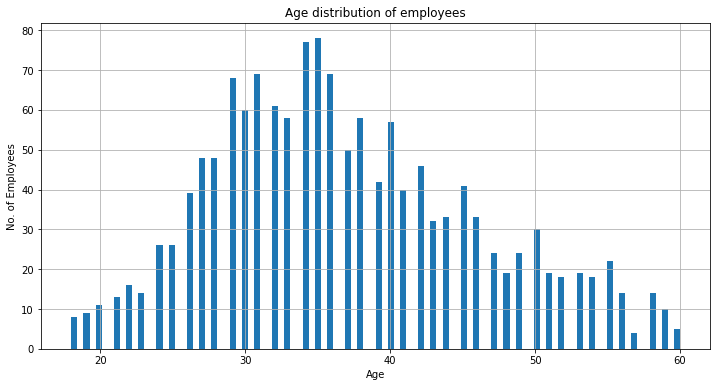

In [5]:
## Plot the Age distribution 
plt.figure(figsize=(12,6))
dataset['Age'].hist(bins=100)
plt.title("Age distribution of employees")
plt.xlabel("Age")
plt.ylabel("No. of Employees")
plt.show()

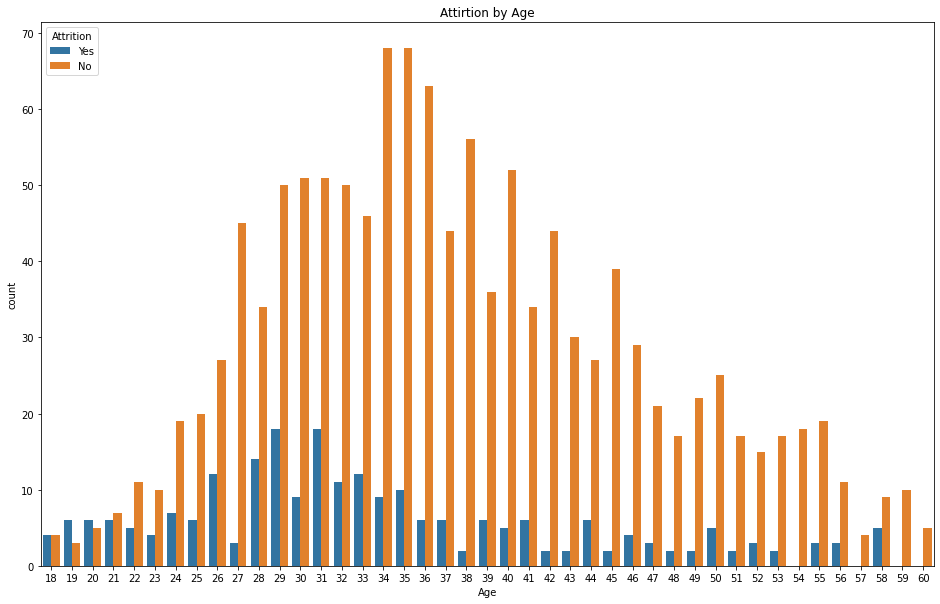

In [6]:
## Explore Attrition by Age
plt.figure(figsize=(16,10))
sns.countplot(x='Age', hue='Attrition', data=dataset)
plt.title("Attirtion by Age")
plt.show()

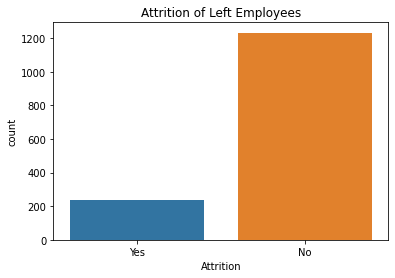

In [7]:
## Explore data for Left employees
sns.countplot(x='Attrition',data=dataset)
plt.title("Attrition of Left Employees")
plt.show()

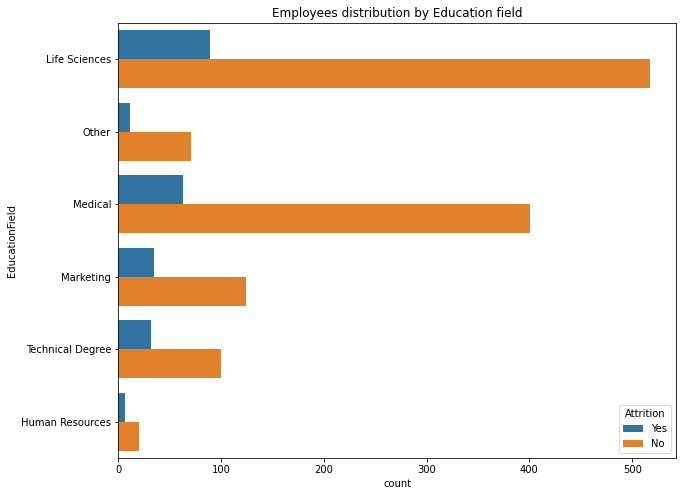

In [8]:
## Explore the distribution of employees by the education field
plt.figure(figsize=(10,8))
sns.countplot(y='EducationField', hue='Attrition', data=dataset)
plt.title("Employees distribution by Education field")
plt.show()

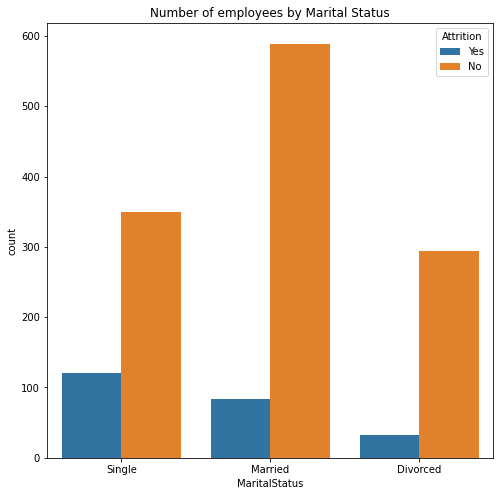

In [9]:
## Explore number of Married and unmarried employees
plt.figure(figsize=(8,8))
sns.countplot(x='MaritalStatus', hue='Attrition', data=dataset)
plt.title("Number of employees by Marital Status")
plt.show()

In [5]:
## Build Logistic Regression Model to predict which employees are likely to attrite
dataset.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [6]:
dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [7]:
dataset['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
dataset['Attrition'].dtype

dtype('O')

In [6]:
dataset['Attrition'].replace('Yes',1, inplace=True)
dataset['Attrition'].replace('No',0, inplace=True)

In [7]:
dataset.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [9]:
X=dataset.drop(['Attrition'],axis=1)
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [10]:
Y=dataset['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [11]:
dataset['EducationField'].replace('Life Sciences',1, inplace=True)
dataset['EducationField'].replace('Medical',2, inplace=True)
dataset['EducationField'].replace('Marketing',3, inplace=True)
dataset['EducationField'].replace('Other',4, inplace=True)
dataset['EducationField'].replace('Technical Degree',5, inplace=True)
dataset['EducationField'].replace('Human Resources',6, inplace=True)
dataset['Department'].replace('Research & Development',1, inplace=True)
dataset['Department'].replace('Sales',2, inplace=True)
dataset['Department'].replace('Human Resources',3, inplace=True)
dataset['MaritalStatus'].replace('Married',1, inplace=True)
dataset['MaritalStatus'].replace('Single',2, inplace=True)
dataset['MaritalStatus'].replace('Divorced',3, inplace=True)

In [12]:
dataset['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [15]:
dataset['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [16]:
dataset['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [17]:
x=dataset.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [18]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [19]:
y=dataset['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [13]:
y, x = dmatrices("Attrition ~ Age + Department + DistanceFromHome + Education + EducationField + YearsAtCompany",
                 dataset, return_type="dataframe")
print(x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [14]:
y=np.ravel(y)

In [15]:
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(x, y)

## Check accuracy on the training set

model.score(x, y)

0.8408163265306122

In [26]:
y.mean()

0.16122448979591836

In [21]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [22]:
predicted=model2.predict(X_test)
print(predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [23]:
probability=model2.predict_proba(X_test)
print(probability)

[[0.86179625 0.13820375]
 [0.80754593 0.19245407]
 [0.74123939 0.25876061]
 [0.83441335 0.16558665]
 [0.73499938 0.26500062]
 [0.79097744 0.20902256]
 [0.85615198 0.14384802]
 [0.85699671 0.14300329]
 [0.96699056 0.03300944]
 [0.93685207 0.06314793]
 [0.95099274 0.04900726]
 [0.83101547 0.16898453]
 [0.86296555 0.13703445]
 [0.86581193 0.13418807]
 [0.88750601 0.11249399]
 [0.88892617 0.11107383]
 [0.88569724 0.11430276]
 [0.78516585 0.21483415]
 [0.7979449  0.2020551 ]
 [0.88511301 0.11488699]
 [0.70651596 0.29348404]
 [0.94676691 0.05323309]
 [0.86736255 0.13263745]
 [0.84276454 0.15723546]
 [0.60336851 0.39663149]
 [0.811292   0.188708  ]
 [0.91813729 0.08186271]
 [0.93285521 0.06714479]
 [0.68230761 0.31769239]
 [0.87027136 0.12972864]
 [0.87266384 0.12733616]
 [0.7696874  0.2303126 ]
 [0.86435769 0.13564231]
 [0.95758879 0.04241121]
 [0.84461485 0.15538515]
 [0.8671935  0.1328065 ]
 [0.90465979 0.09534021]
 [0.68936427 0.31063573]
 [0.90703616 0.09296384]
 [0.80663477 0.19336523]


In [25]:
model3=sm.OLS(y,x)
result3=model3.fit()
print(result3.summary())
from sklearn import metrics

print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probability[:, 1]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     12.47
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           9.62e-14
Time:                        12:25:24   Log-Likelihood:                -578.62
No. Observations:                1470   AIC:                             1171.
Df Residuals:                    1463   BIC:                             1208.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2682      0.051  

In [77]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [79]:
print(X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [82]:
vv=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 100.0]]
print(model.predict_proba(vv))

[[3.91613733e-04 9.99608386e-01]]


/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
